In [5]:
import numpy as np
from skopt import gp_minimize
import matplotlib.pyplot as plt

Plotting the equation

In [12]:
def f(x):
    return (x-2) ** 2

In [15]:
x = np.linspace(-100,100,400)
y = f(x)

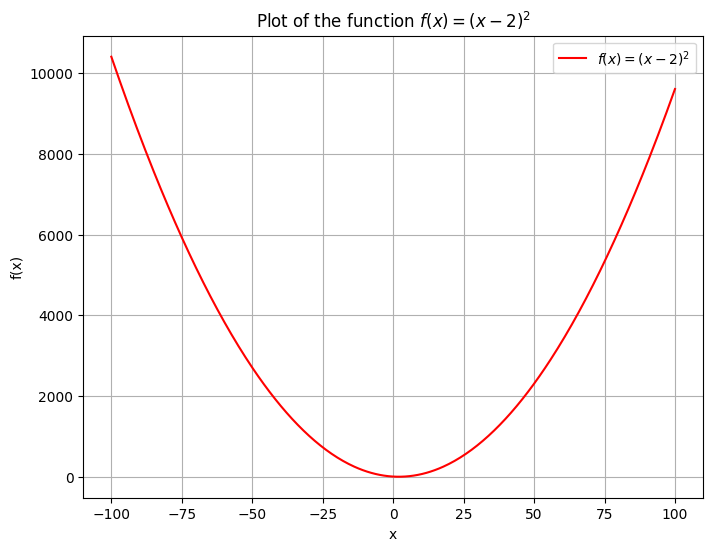

In [17]:
# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'r-', label=r'$f(x) = (x-2)^2$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of the function $f(x) = (x-2)^2$')
plt.legend()
plt.grid(True)
plt.show()

/opt/anaconda3/envs/meng/lib/python3.10/site-packages/skopt/learning/gaussian_process/gpr.py:355: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn(
/var/folders/mg/l5f3xml94wjb2ks03kfgl9840000gn/T/ipykernel_83907/305049651.py:40: RuntimeWarning: divide by zero encountered in divide
  Z = improvement / y_std


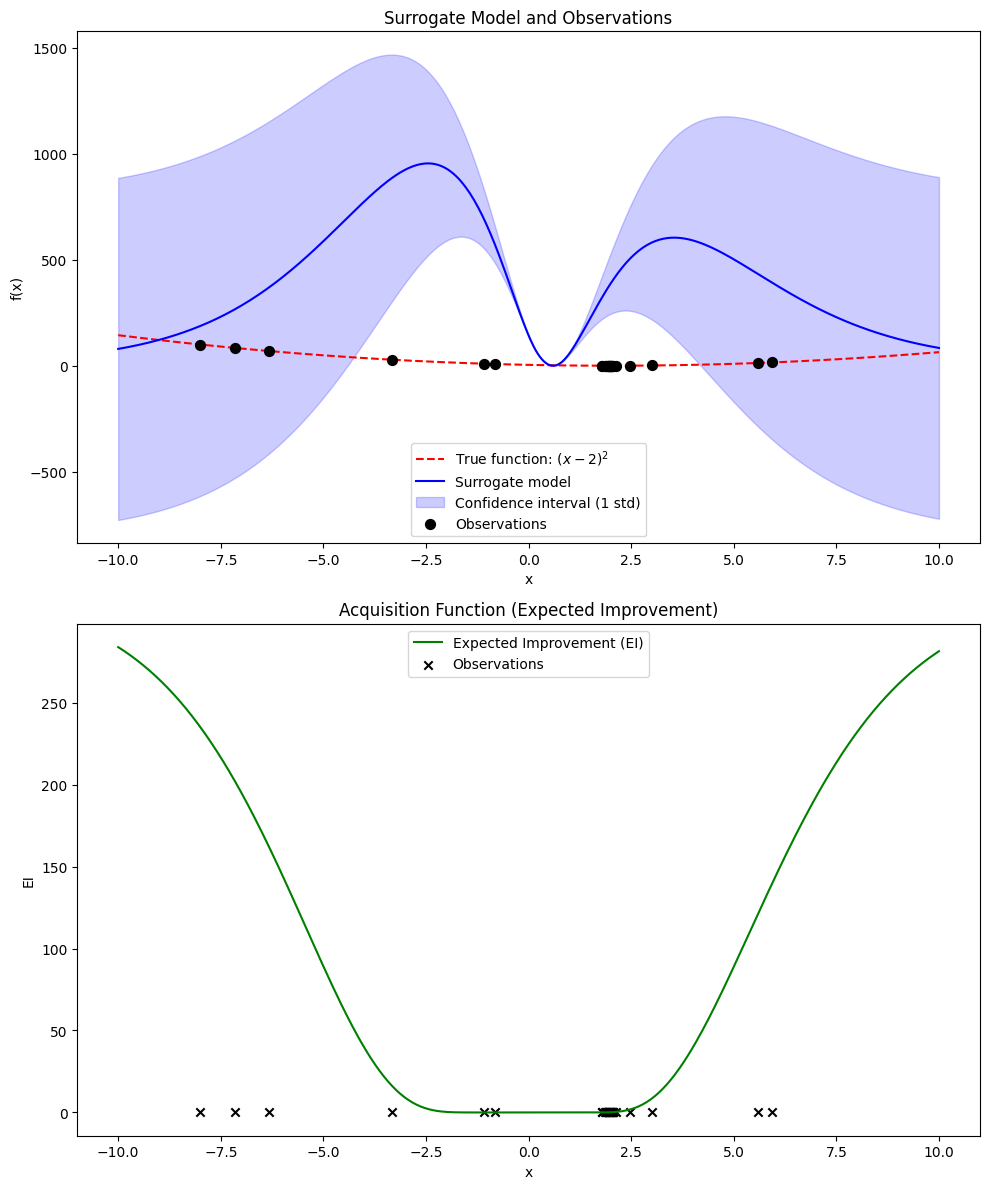

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from skopt import gp_minimize
from scipy.stats import norm

# Define the objective function to minimize.
def objective(x):
    # x is provided as a list; our function is (x-2)^2.
    return (x[0] - 2) ** 2

# Define the search space: a single parameter between -10 and 10.
search_space = [(-10.0, 10.0)]

# Run Bayesian Optimization using Gaussian Process as surrogate model.
# acq_func="EI" specifies the Expected Improvement acquisition function.
result = gp_minimize(objective, 
                     search_space, 
                     acq_func="EI", 
                     n_calls=30, 
                     random_state=42)

# Create a dense grid for plotting.
x_grid = np.linspace(-10, 10, 400).reshape(-1, 1)
# True function values.
y_true = (x_grid - 2) ** 2

# Extract the final surrogate model (Gaussian Process).
# (result.models is a list of models fitted at each iteration).
model = result.models[-1]
# Get the surrogate model's prediction and the standard deviation.
y_pred, y_std = model.predict(x_grid, return_std=True)

# Compute the Expected Improvement (EI) acquisition function.
# For minimization, EI is given by:
#   EI(x) = (f_min - mu(x)) * Phi(Z) + sigma(x) * phi(Z)
# where Z = (f_min - mu(x)) / sigma(x)
f_min = np.min(result.func_vals)
improvement = f_min - y_pred
# To avoid division by zero, calculate Z carefully.
Z = improvement / y_std
# Compute EI using the normal CDF (Phi) and PDF (phi)
ei = improvement * norm.cdf(Z) + y_std * norm.pdf(Z)
# When sigma is 0, set EI to 0.
ei[y_std == 0.0] = 0.0

# Plotting the results: two subplots (Surrogate model and Acquisition function)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# --- Top Plot: Surrogate Model ---
ax1.plot(x_grid, y_true, 'r--', label='True function: $(x-2)^2$')
ax1.plot(x_grid, y_pred, 'b-', label='Surrogate model')
# Confidence interval: predicted mean ± one standard deviation.
ax1.fill_between(x_grid.flatten(), y_pred - y_std, y_pred + y_std,
                 alpha=0.2, color='blue', label='Confidence interval (1 std)')
# Plot the points that were sampled during the optimization.
x_obs = np.array(result.x_iters)
y_obs = np.array([objective([x]) for x in x_obs])
ax1.scatter(x_obs, y_obs, c='black', s=50, zorder=10, label='Observations')
ax1.set_xlabel("x")
ax1.set_ylabel("f(x)")
ax1.set_title("Surrogate Model and Observations")
ax1.legend()

# --- Bottom Plot: Acquisition Function (Expected Improvement) ---
ax2.plot(x_grid, ei, 'g-', label='Expected Improvement (EI)')
# Mark the observation locations along the x-axis.
ax2.scatter(x_obs, np.zeros_like(x_obs), c='black', marker='x', label='Observations')
ax2.set_xlabel("x")
ax2.set_ylabel("EI")
ax2.set_title("Acquisition Function (Expected Improvement)")
ax2.legend()

plt.tight_layout()
plt.show()
